In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Dataset

In [2]:
dataset='bone_tumor'

from loader import DataLoader
dl = DataLoader()
primitive_matrix, ground = dl.load_data(dataset=dataset)

In [3]:
#TODO formalize
train_primitive_matrix = primitive_matrix[0:400,:]
train_ground = ground[0:400]

val_primitive_matrix = primitive_matrix[400:600,:]
val_ground = ground[400:600]

## Synthesize Heuristics

In [4]:
from synthesizer import Synthesizer
syn = Synthesizer(val_primitive_matrix, val_ground)

In [5]:
hf, feat_combos = syn.generate_heuristics()
X_train = train_primitive_matrix[:,feat_combos]
L_train = syn.apply_heuristics(hf,X_train)

X_val = val_primitive_matrix[:,feat_combos]
L_val = syn.apply_heuristics(hf,X_val)

### Heuristic Statistics

In [6]:
#TODO call the function, print TP/FP/F1/P/R etc in pandas format
np.mean(L_val.T == val_ground, axis=1)

array([ 0.535,  0.545,  0.55 ,  0.545,  0.545,  0.505,  0.675,  0.705,
        0.64 ,  0.685,  0.585,  0.655,  0.74 ,  0.625,  0.635,  0.62 ,
        0.55 ])

## Verify Heuristics

In [52]:
from verifier import Verifier
vf = Verifier(L_train, L_val, val_ground)

In [53]:
vf.train_gen_model()
vf.gen_model.learned_lf_stats()

Inferred cardinality: 2


,Accuracy,Coverage,Precision,Recall
0,0.891871,0.7602,0.934155,0.678503
1,0.901966,0.7732,0.939355,0.693698
2,0.902394,0.7602,0.946440,0.686820
3,0.901465,0.7713,0.943603,0.687780
4,0.860016,0.7508,0.909662,0.649072
5,0.847133,0.7307,0.899513,0.619962
6,0.875975,0.7434,0.921976,0.659629
7,0.819359,0.7180,0.882521,0.591171
8,0.876614,0.7513,0.922387,0.657710
9,0.883349,0.7561,0.927527,0.669386


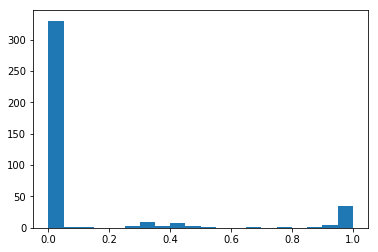

In [57]:
vf.assign_marginals()
plt.hist(vf.train_marginals, bins=20)
plt.show()

In [64]:
vague_idx = vf.find_vague_points(b=0.6, thresh=0.15)
incorrect_idx = vf.find_incorrect_points(b=0.6)
#TODO call the function, print TP/FP/F1/P/R etc in pandas format
1-np.shape(incorrect_idx)[1]/float(np.shape(val_ground)[0])

0.61